In [63]:
#1.	Import libraries that you required and Load the data set.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df=pd.read_csv("C:\\Users\\Dell\\Downloads\\Project 3-1\\Project 3\\Zomoto.CSV")

In [65]:
dz=df.copy()
dz.rename(columns={'Unnamed: 0':'ID'},inplace=True)                    # Davanagere Benne Dose
#dz[dz.duplicated(subset='ID')]                                        # Naati Manae
dz.drop_duplicates(subset='ID',inplace=True)                           # Kitchens@Whitefield
                                                                       #27983,19795,12492   


2.	Which are the top restaurant chains based on the distribution(frequency) in Bangaluru?

In [66]:
print((dz['name'].value_counts()[dz['name'].value_counts()> 10]))
#(dz['name'].value_counts()[dz['name'].value_counts()> 10])


Cafe Coffee Day              17
McDonald's                   16
Baskin Robbins               16
Onesta                       15
Keventers                    15
Petoo                        14
KFC                          14
The Chocolate Heaven         14
Corner House Ice Cream       13
SGS Non Veg - Gundu Pulav    13
Sweet Truth                  13
Sweet Chariot                12
Smoor                        12
Mad Over Donuts              12
Kanti Sweets                 12
Pathaan Sir                  11
Ambur Hot Dum Biryani        11
Wangs Kitchen                11
Tata Cha                     11
Name: name, dtype: int64


In [67]:
#3.How many restaurants do not accept online orders?
print("the total resturaunts not accepting online orders are",dz.query("online_order=='No'").shape[0])

the total resturaunts not accepting online orders are 3668


In [68]:
#4.What is the ratio b/w restaurants that provide and do not provide table booking
print('The ratio between restaurants that provide and do not provide table booking is ',end ="")
print(round(dz[dz["book_table"]=="Yes"].shape[0]/dz[dz["book_table"]=="No"].shape[0],3))


The ratio between restaurants that provide and do not provide table booking is 0.141


In [69]:
#5.Use a boxplot on the rating column. Use User Defined Function or Lambda function or Apply function to extract the data that comes before /. Kindly exclude /.
def sp(x):
    if x=="NEW":
        return "NEW"
    elif x=='-':
        return "-"
    else:
        return float(str(x).split(sep='/')[0])
dz["rate"]=dz.rate.map(sp)

4.0

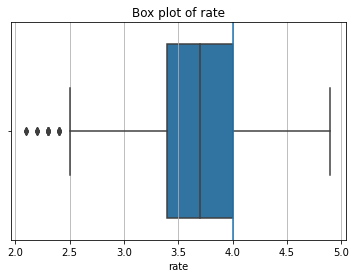

In [70]:
df4=dz.query("rate!=['NEW','-']")                        #AVG rate i
plt.title('Box plot of rate')
plt.grid()
sns.boxplot(x=df4.rate)
q1=df4.rate.quantile(.75)
plt.axvline(q1)
q1

Yes    59.652403
No     40.347597
Name: online_order, dtype: float64


Text(0.5, 1.0, 'Online and Offline orders restaurants percentage')

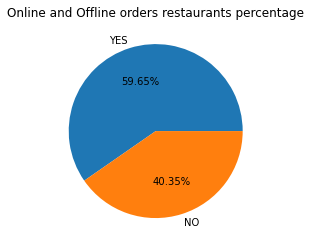

In [71]:
#6.Online and Offline orders restaurants percentage.
print(dz.online_order.value_counts(normalize=True)*100)
plt.pie(x=dz.online_order.value_counts(),labels=['YES',"NO"],autopct="%.2f%%")
plt.title('Online and Offline orders restaurants percentage')

C:\Users\Dell\AppData\Local\Temp\ipykernel_1752\2622253657.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["approx_cost(for two people)"]=df4['approx_cost(for two people)'].map(c)


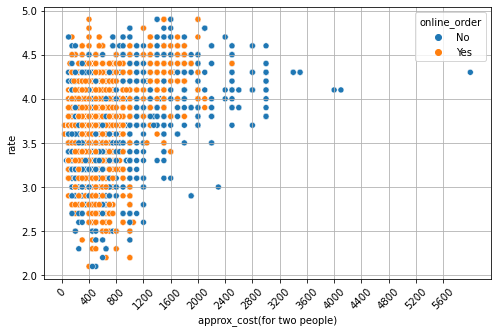

In [72]:
#7 #Plot the scatter plot using the Cost vs rating variable with respect to online order. 
# Use apply the function Or other function to remove the “,”.
def c(x):
    if type(x)==str:
       return int(x.replace(',',''))                            #to be only online order
    else:
       return x
df4["approx_cost(for two people)"]=df4['approx_cost(for two people)'].map(c)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df4["approx_cost(for two people)"],y=df4.rate,hue=df4.online_order)
plt.xticks(np.arange(0,6000,400),rotation=45)
plt.grid()
plt.show()


  8.Find the distribution of the votes and Approx_cost using a user-defined function and for a loop.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


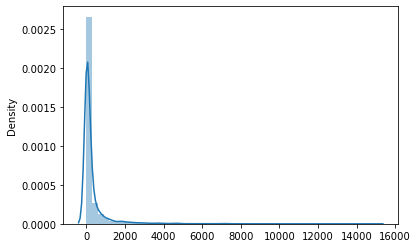

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


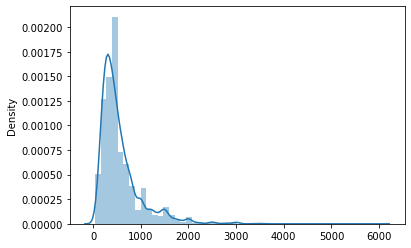

In [73]:
#sns.displot(x=df4.votes,y=df4.rate,kind="hist")
df5=(df4[['votes','approx_cost(for two people)']])
for i in df5.columns:
      sns.distplot(x=df5[i])
      plt.show()
# sns.boxplot(x=df4['approx_cost(for two people)'])
# plt.show()
# sns.boxplot(x=df4['votes'])
# plt.show()

In [74]:
#9.Which are the most common restaurant type in Banglore?
rest=[]
dz.rest_type.map(lambda x: rest.append(str(x).split(',')))
rest
rest_type=[i.lower().strip() for j in rest for i in j]
df6=pd.DataFrame(rest_type,columns=['rest_type'])
print(df6.value_counts().head(10))

rest_type     
quick bites       3573
casual dining     2337
cafe               921
delivery           850
dessert parlor     583
bar                425
takeaway           418
bakery             358
beverage shop      249
pub                177
dtype: int64


10.	Is there any difference b/w the votes of restaurants accepting and not accepting online orders

In [75]:
pd.pivot_table(data=dz,index="online_order",values="votes",aggfunc=["count","sum","mean"])

,count,sum,mean
,votes,votes,votes
online_order,,,
No,3668,1030499,280.943021
Yes,5423,1635259,301.541398


In [76]:
#11.	Which are the most common restaurant type in Banglore?
rest=[]
dz.rest_type.map(lambda x: rest.append(str(x).split(',')))
rest
rest_type=[i.lower().strip() for j in rest for i in j]
df6=pd.DataFrame(rest_type,columns=['rest_type'])
print(df6.value_counts().head(10))

rest_type     
quick bites       3573
casual dining     2337
cafe               921
delivery           850
dessert parlor     583
bar                425
takeaway           418
bakery             358
beverage shop      249
pub                177
dtype: int64


In [77]:
#12.Find the Best budget Restaurants in any location.

In [78]:
#sns.boxplot(y=df4.rate)  to check avg rate of all restaurants
df12=df4[(df4["approx_cost(for two people)"]<300) & (df4["rate"]>3.6)]
df13= df12.groupby(by='location')[["name",'location',"approx_cost(for two people)","rate"]]
# for i in df13.groups:
#     print(df13.get_group(i))
# print(df12.location.value_counts().count()) #to check how many location got atleats 1 restuarant
# df4.location.value_counts().count


In [79]:
df15=pd.pivot_table(data=df12,index=["location",'name',"rate"],values=['approx_cost(for two people)'])
df15

approx_cost(for two people)
location      name                      rate                             
BTM           Adithya Family Restaurant 3.7                         250.0
              BTM Ghar ka Khana         3.7                         200.0
              Bansuri Sweets            3.8                         200.0
              Big Mishra Pedha          3.7                         250.0
              CakeZone                  4.1                         200.0
...                                                                   ...
Whitefield    Pulla Reddy Sweets        3.7                         250.0
              The South                 3.7                         200.0
Wilson Garden Parathe Wali Gali         3.8                         250.0
                                        3.9                         250.0
Yeshwantpur   Om Sai Ram Food Junction  3.7                         200.0

[398 rows x 1 columns]

In [80]:
#13.	Top quick bites restaurant chains in Banglore.

In [81]:
df16=df4.loc[df4['rest_type'].str.contains("quick bites",case=False,na=False)]
df17=df16[df16['rate']>3.7]
#df16.name,value_counts.head(15) #without considering rating
df17.name.value_counts().head(15)

Taco Bell                      9
SGS Non Veg - Gundu Pulav      8
Pathaan Sir                    7
Just Shawarma                  7
Hatti Kaapi                    7
Kanti Sweets                   7
Leon Grill                     7
McDonald's                     7
Khan Saheb Grills and Rolls    6
California Burrito             6
Haji Ali Juice Centre          6
Juice Junction                 6
Petoo                          6
Biggies Burger 'n' More        5
Burger King                    5
Name: name, dtype: int64

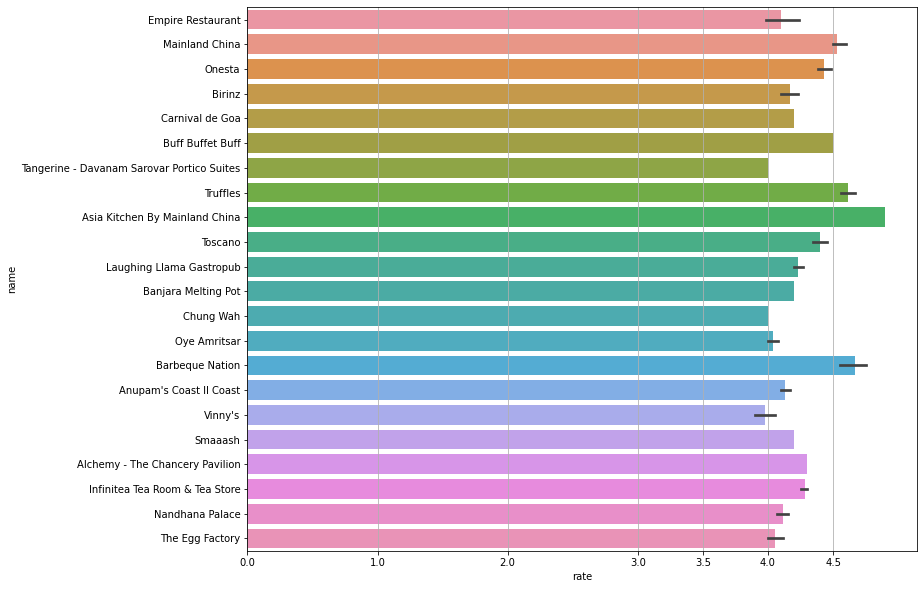

In [82]:
# 14.	Which are the most popular casual dining restaurant chains,
# Make use of any plot related to this question
df18=df4.loc[(df4['rest_type'].str.contains("Casual Dining",case=False,na=False)) & (df4['rate']>3.8) ]
# for rating > 4 only one value
#print(df14.rate.value_counts().sort_index())
a=df18['name'].value_counts()[df18['name'].value_counts()>5].index
df19=df18[df18.name.map(lambda x : x in list(a))]
plt.figure(figsize=(12,10))
plt.xticks(ticks=[0,1,2,3,3.5,4,4.5])
plt.grid()
sns.barplot(y=df19.name,x=df19.rate)
#sns.barplot(y=df15.name,x=df15.votes)
plt.show()

In [83]:
#15.	Which are the most popular cuisines of Bangalore using a related plot?


In [84]:
#print(dz.cuisines.unique())
#print(dz.cuisines.value_counts())

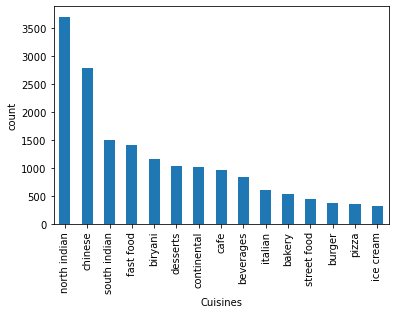

In [178]:
cusi=[]
dz.cuisines.map(lambda x: cusi.append( str(x).split(',')))
cs=[i.lower().strip() for j in cusi for i in j]
df20=pd.DataFrame(cs,columns=["name"])
plt.xlabel('Cuisines')
plt.ylabel('count')
df20.name.value_counts().head(15).plot(kind='bar')
plt.show()

In [25]:
# out of box- top liked dish based on customer input
#1
dish=[]
df4.dish_liked.map(lambda x: dish.append(str(x).split(',')))
dish_l=[i.lower().strip() for j in dish for i in j]
dish_liked=[ x for x in dish_l if x!='nan']
dfo=pd.DataFrame(dish_liked,columns=["dish_name"])
dfo.value_counts().head(20)

dish_name      
pasta              615
burgers            538
cocktails          511
pizza              486
coffee             368
biryani            342
mocktails          333
sandwiches         308
paratha            291
salads             253
nachos             247
noodles            245
fish               235
beer               224
chicken biryani    221
mutton biryani     216
tea                204
thali              185
momos              184
waffles            183
dtype: int64

In [95]:
#top dish liked based on location from customers input
#2
dm=dz.copy()
dm['dish_liked']=dm['dish_liked'].str.split(',')
dfo2=dm.explode('dish_liked')
dfo2.dish_liked=dfo2.dish_liked.map(lambda x:str(x).lower().strip())
dfo3=dfo2[dfo2['dish_liked']!='nan']

In [142]:
d=list(dfo3.dish_liked.value_counts().head(20).index) # filtering the dishliked based on frequnecy of occurence
dfo3=dfo3[dfo3.dish_liked.map(lambda x: x in d)]
pd.pivot_table(dfo3,index=['location',"dish_liked"],values='ID',aggfunc='count',sort=False)
# these are the number of times customers mentioned/liked dish based on location
#this gives an overall idea of top dishes trending based on location which will helep new players to consider


ID
location                   dish_liked         
BTM                        thali            21
                           paratha          44
Malleshwaram               cocktails        14
                           mocktails        11
Frazer Town                sandwiches        7
...                                         ..
Sahakara Nagar             biryani           1
ITPL Main Road, Whitefield pasta             1
Rajajinagar                chicken biryani   1
Kanakapura Road            biryani           1
Koramangala 3rd Block      beer              1

[890 rows x 1 columns]

In [176]:
#3 no of restaurants where no one voted
df4[df4['votes']==0].shape[0]
print(pd.pivot_table(data=df4[df4["rate"]>4.5],index=['rate'],values=['votes'],aggfunc=['mean','sum']))
# avg votes for rating more than 4
print(pd.pivot_table(data=df4[df4["rate"]<2.5],index=['rate'],values=['votes'],aggfunc=['mean','sum']))
# as we can see there is big difference between mean and sum of votes for good and bad ratings
#so to get more clarity no of votes for bad rating should be improved

             mean     sum
            votes   votes
rate                     
4.6   2310.526316  131700
4.7   5547.176471  188604
4.8   2283.909091   25123
4.9   3069.666667   46045
            mean   sum
           votes votes
rate                  
2.1   307.000000   921
2.2   335.500000  1342
2.3   211.916667  2543
2.4   129.750000  1038


<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='rate'>

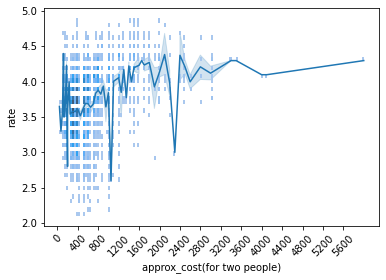

In [213]:
#4
#rate vs approx_cost
plt.xticks(np.arange(0,6000,400),rotation=45)
sns.lineplot(y=df4.rate,x=df4['approx_cost(for two people)'])
sns.histplot(y=df4.rate,x=df4['approx_cost(for two people)'])